In [28]:
%cd drive/MyDrive/thesis
%ls

[Errno 2] No such file or directory: 'drive/MyDrive/thesis'
/content/drive/MyDrive/thesis
cc.zh.300.bin                                  wen_wuu_sent_alignment.csv
cmn_wen_sent_alignment.csv                     wen_yue_sent_alignment.csv
cmn_wen_subs.csv                               wen_yue_subs.csv
cmn_wuu_sent_alignment.csv                     wuu_wen_bigram.csv
cmn_wuu_subs.csv                               wuu_wen_sent_alignment.csv
cmn_yue_sent_alignment.csv                     wuu_wen_subs.csv
cmn_yue_subs.csv                               wuu_wen_trigram.csv
cmn-yue-wuu-wen-parallel-simplified.csv        wuu_wen_unigram.csv
cmn-yue-wuu-wen-parallel-simplified_final.csv  wuu_yue_sent_alignment.csv
sgns.merge.char                                wuu_yue_subs.csv


In [29]:
import pandas as pd
import numpy as np
import random
from statistics import stdev, mean, median
import seaborn as sns
import chinese_converter as cc

In [30]:
data = pd.read_csv("cmn-yue-wuu-wen-parallel-simplified_final.csv", encoding="utf-8")
data

,Unnamed: 0,cmn_id,cmn_sentence,wuu_sentence,wen_sentence,yue_sentence
0,0,1,我们试试看！,阿拉试试！,卬你试试眙！,我哋试吓吖！
1,1,51,那又怎样?,哏末哪能呢？,那就訾那能爻？,嗯，咁呢？
2,2,339240,不要说废话！,侬勿要瞎讲！,覅讲废话！,唔好喺度乱噏廿四！
3,3,340093,这个苹果很酸。,搿只苹果老酸个。,居个苹果酸显酸。,呢粒苹果好酸。
4,4,342196,别忘了明天六时来接我。,勿要忘记脱明朝6点钟来寻我。,覅悗记爻明朝六点钟走来接我。,唔好唔记得听日六点嚟搵我喎。
...,...,...,...,...,...,...
135,135,5500559,你们比我还高。,侬比我高。,你厘比我还高哩。,你高过我。
136,136,6559017,你好吗？,侬好伐？,你好啊伐？,你点呀？
137,137,10329955,你们怎么就是没相信我呢？,侬为啥勿相信我？,你厘訾那就冇相信我呢？,你点解唔信我呀？
138,138,10631557,他父母对他怀有过高的期望。,伊拉爷娘对伊期望过高。,渠个爸妈对渠期望忒高。,佢阿爸阿妈对佢期望过高。


In [42]:
wuu = data["wuu_sentence"]
wen = data["wen_sentence"]
yue = data["yue_sentence"]
cmn = data["cmn_sentence"]

In [32]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 88.5 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=05f80c39306ab2711ceb1a258d039b2eba4c41da225e1c65d449ffdc29219413
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence_transformers


In [33]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer("DMetaSoul/sbert-chinese-general-v2-distill")

In [34]:
sen_1 = model.encode(["我们"], convert_to_tensor=True)
sen_2 = model.encode(["我你"], convert_to_tensor= True)
cosine_score = util.cos_sim(sen_1, sen_2)
cosine_score.item(), sen_1.shape, sen_2.shape

(0.8356842398643494, torch.Size([1, 768]), torch.Size([1, 768]))

In [35]:
## function to get average sentence cosine scores for a language pair
def get_allcosineScores(lang_1, lang_2): 
  punc = ["。", "，", "！", "？", "'", "\"", ",", ".", "、", "?", "「", "」"]
  all = {}
  for i, s_1 in enumerate(lang_1):
    s_1 = "".join([c.strip() for c in s_1 if c not in punc])
    s_2 = "".join([c.strip() for c in lang_2[i] if c not in punc])
    emb_1 = model.encode([s_1], convert_to_numpy=True)
    emb_2 = model.encode([s_2], convert_to_numpy=True)
    cos_score = util.cos_sim(emb_1, emb_2).item()
    all[(s_1, s_2)] = cos_score
  return all

In [36]:
get_allcosineScores(["我们试试看"],["阿拉试试"] )

{('我们试试看', '阿拉试试'): 0.8954527378082275}

In [47]:
## 
allscores_wuu_wen = list(get_allcosineScores(wuu, wen).values())
allscores_cmn_wuu = list(get_allcosineScores(cmn, wuu).values())
allscores_wuu_yue = list(get_allcosineScores(wuu, yue).values())
allscores_wuu_wen

[0.8617162704467773,
 0.8422865867614746,
 0.839146614074707,
 0.9172435402870178,
 0.8829739689826965,
 0.9704947471618652,
 0.8832966089248657,
 0.8900120854377747,
 0.9126546382904053,
 0.9184279441833496,
 0.847919762134552,
 0.9360030889511108,
 0.9079103469848633,
 0.9257959723472595,
 0.8774457573890686,
 0.9071623682975769,
 0.9184694886207581,
 0.8625666499137878,
 0.9071007370948792,
 0.8752487301826477,
 0.8968236446380615,
 0.9395954608917236,
 0.8504767417907715,
 0.8863866329193115,
 0.8986138701438904,
 0.8617181777954102,
 0.9490641951560974,
 0.9698478579521179,
 0.9315526485443115,
 0.922871470451355,
 0.888886034488678,
 0.9310423135757446,
 0.8815919160842896,
 0.9588062167167664,
 0.9179086089134216,
 0.9141871929168701,
 0.8979584574699402,
 0.8194842338562012,
 0.985375165939331,
 0.9934934973716736,
 0.9620416164398193,
 0.9718308448791504,
 0.9707593321800232,
 0.9180324673652649,
 0.918919026851654,
 0.9016063213348389,
 0.9590359330177307,
 0.8895856738090515

In [49]:
max(allscores_cmn_wuu)-min(allscores_wuu_yue), max(allscores_cmn_wuu), min(allscores_wuu_yue)

(0.20906507968902588, 0.9992793202400208, 0.7902142405509949)

In [38]:
def get_distribution(lang1, lang2):
  all_avg_scores = []
  scores = list(get_allcosineScores(lang1, lang2).values())
  for i in range(1000):  
    sent_scores = random.choices(scores, k=len(scores))
    avg_score = sum(sent_scores)/len(sent_scores)
    all_avg_scores.append(avg_score)
  return all_avg_scores

def plot(df, color=None, annotate_mean=True):
  # Calculating mean and standard deviation
  m, sd = 0, 0 
  ax = sns.kdeplot()
  t = 0
  for name in df.columns:
    md = median(df[name])
    mn = mean(df[name])
    sd = stdev(df[name])
    print("Language pair:", name[:3]+",", name[4:8])
    print("mean: ", mn, ";", "median: ", md, "standard derivation: ", sd)
    print("2u: ", md-2*sd, "-", md+2*sd)
    #ax = sns.histplot(df, stat="probability", kde=True, color=color) 
    if annotate_mean:
      ax.axvline(x=md, color="pink")
      t += 1
      ax.annotate(s="median: "+str(md)[:5], xy=(md+0.001,t))
    ax = sns.kdeplot(data=df, color=color, common_norm=True) #bw_adjust=.5) 
    ax.plot()

In [39]:
## cmn and wen
cmn_wen = get_distribution(cmn, wen)
cmn_wuu = get_distribution(cmn, wuu)
cmn_yue = get_distribution(cmn, yue)
wuu_wen = get_distribution(wuu, wen)
wuu_yue = get_distribution(wuu, yue)
wen_yue = get_distribution(wen, yue)

In [40]:
stack = np.stack((np.array(cmn_wen),np.array(cmn_wuu), np.array(cmn_yue),
                  np.array(wuu_wen), np.array(wuu_yue), np.array(wen_yue)), axis=1)
all_df = pd.DataFrame(stack, columns=["cmn_wen", "cmn_wuu", "cmn_yue", "wuu_wen", "wuu_yue", "wen_yue"])

Language pair: cmn, wen
mean:  0.9252198655694723 ; median:  0.9253338724374771 standard derivation:  0.0036222932059968606
2u:  0.9180892860254833 - 0.9325784588494709
Language pair: cmn, wuu
mean:  0.9261394410840103 ; median:  0.9262279433863504 standard derivation:  0.0035627893488289577
2u:  0.9191023646886924 - 0.9333535220840083
Language pair: cmn, yue
mean:  0.9202772454300097 ; median:  0.9201970862490789 standard derivation:  0.003954866900631579
2u:  0.9122873524478158 - 0.9281068200503421
Language pair: wuu, wen
mean:  0.9148837709186746 ; median:  0.9147391617298126 standard derivation:  0.003476445424719984
2u:  0.9077862708803727 - 0.9216920525792526
Language pair: wuu, yue
mean:  0.9083621291896723 ; median:  0.9085002437125158 standard derivation:  0.003163930289361094
2u:  0.9021723831337937 - 0.914828104291238
Language pair: wen, yue
mean:  0.9168059400151605 ; median:  0.9167147492584975 standard derivation:  0.003111615364300896
2u:  0.9104915185298957 - 0.92293797

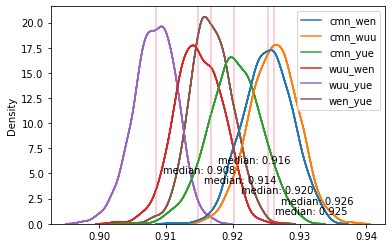

In [41]:
plot(all_df)